# **_Madrid house price prediction_**

En este proyecto de ciencia de datos, hemos llevado a cabo un análisis detallado de un conjunto de datos de ventas de viviendas en Madrid , con el propósito de desarrollar un modelo predictivo preciso para estimar los precios de las propiedades. A través de un exhaustivo Análisis Exploratorio de Datos (EDA), hemos obtenido una comprensión profunda de las características y relaciones clave entre las variables. Ahora, nos encontramos en una fase crucial: la construcción, evaluación y selección del modelo más adecuado para el pronóstico.

## **_1. Contexto_**


## **_2. Datos_**
Los datos se refieren a las viviendas de la ciudad de Madrid a lo largo de sus 21 distritosun 

### **_2.1 Carga de datos_**

In [49]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Importing ML libraries and metrics
from math import sqrt
from tqdm import tqdm
import lightgbm as lgb
from lightgbm import LGBMRegressor
import xgboost as xgb
from sklearn.linear_model import Lasso
from lightgbm import early_stopping, log_evaluation
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV


^C
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade pip


   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.8 MB 1.3 MB/s eta 0:00:02
   -------- ------------------------------- 0.4/1.8 MB 4.0 MB/s eta 0:00:01
   -------------------- ------------------- 0.9/1.8 MB 6.5 MB/s eta 0:00:01
   -------------------------- ------------- 1.2/1.8 MB 6.4 MB/s eta 0:00:01
   ---------------------------------------  1.8/1.8 MB 7.8 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 7.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0
Note: you may need to restart the kernel to use updated packages.


In [4]:
df= pd.read_csv('./data/dfEDA_final.csv',index_col=False)
#dfb= pd.read_csv('./dfEDA_final.csv',index_col=False)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6320\4230695949.py:1: DtypeWarning: Columns (94) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('./data/dfEDA_final.csv',index_col=False)


### **_Ajustes extra_**

In [5]:
# Ajusta las opciones de visualización
pd.set_option('display.max_rows', None)  # Muestra todas las filas
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### **_Seleccion del modelo_**

In [6]:
df.columns.tolist()


['Unnamed: 0',
 'url',
 'm2_constr',
 'distrito',
 'cod_distrito',
 'barrio',
 'cod_barrio',
 'letra_ce',
 'amueblado',
 'planta',
 'dormitorios',
 'banos',
 'balcon',
 'terraza',
 'trastero',
 'ascensor',
 'tipo_inmueble',
 'tiene_armario',
 'cancha_tenis',
 'chimenea',
 'exterior',
 'interior',
 'porton_electrico',
 'videoportero',
 'acceso_discapacidad',
 'precio',
 'web',
 'armarios',
 'codigo_postal',
 'm2_utiles',
 'certificado_energetico',
 'puerta_seguridad',
 'gastos_comunidad',
 'agua_caliente',
 'portero',
 'orientacion_este',
 'orientacion_oeste',
 'orientacion_sur',
 'clasificacion_aire',
 'orientacion_norte',
 'letra_emisiones',
 'tipo_calefaccion',
 'energia_calefaccion',
 'instalacion_calefaccion',
 'num_personas',
 'num_personas_hombres',
 'num_personas_mujeres',
 'total_transacciones',
 'viv_nuevas_transacciones',
 'viv_usadas_transacciones',
 'lineas_metro',
 'num_lineas_buses',
 'renta neta media por persona',
 'renta neta media por hogar',
 'mediana de la renta por

In [7]:
df=df.drop(columns='Unnamed: 0')
# Renombrar una columna
df.rename(columns={'tamaño del hogar (nº de personas en la vivienda)': 'tamano_hogar'}, inplace=True)


In [8]:
df.columns = df.columns.str.replace(' ', '_')

In [9]:
#quitamos la variable euros_m2, no se puede usar
df=df.drop(columns='euros_m2')

In [10]:
# Basic dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10009 entries, 0 to 10008
Columns: 125 entries, url to total_estaciones
dtypes: float64(26), int64(86), object(13)
memory usage: 9.5+ MB


In [11]:
# Identifying the unique number of values in the dfset
df.nunique()

url                                          10009
m2_constr                                      551
distrito                                        21
cod_distrito                                    21
barrio                                         131
cod_barrio                                     131
letra_ce                                         8
amueblado                                        4
planta                                          29
dormitorios                                     17
banos                                           13
balcon                                           2
terraza                                          2
trastero                                         2
ascensor                                         2
tipo_inmueble                                    5
tiene_armario                                    2
cancha_tenis                                     2
chimenea                                         2
exterior                       

### 2.2 Análisis de datos

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6320\3746159673.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['precio'], kde=True, palette='Set1')


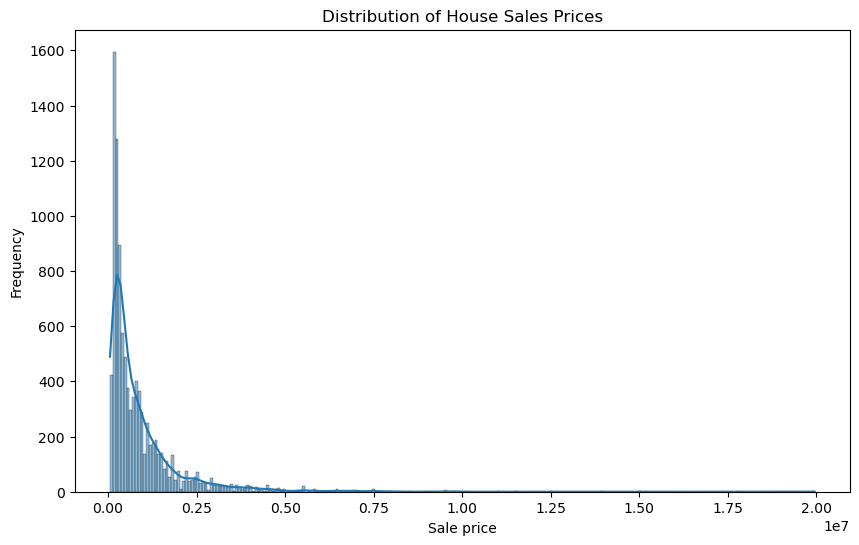

In [12]:
# View the distribution of the target variable (price)
plt.figure(figsize=(10, 6))
sns.histplot(df['precio'], kde=True, palette='Set1')
plt.title('Distribution of House Sales Prices')
plt.xlabel('Sale price')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [13]:
# Check for missing values
df.isnull().sum()

url                                             0
m2_constr                                       0
distrito                                        0
cod_distrito                                    0
barrio                                          0
cod_barrio                                      0
letra_ce                                        0
amueblado                                       0
planta                                          0
dormitorios                                     0
banos                                           0
balcon                                          0
terraza                                         0
trastero                                        0
ascensor                                        0
tipo_inmueble                                   0
tiene_armario                                   0
cancha_tenis                                    0
chimenea                                        0
exterior                                        0


In [14]:
df["tipo_garaje"].value_counts()

tipo_garaje
privado    226
público     72
Name: count, dtype: int64

In [15]:
df["tipo_garaje"]=df["tipo_garaje"].fillna("desconocido")

In [16]:
df["tipo_garaje"].isna().sum()

0

In [17]:
# Viewing the df statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
m2_constr,10009.00,138.61,152.04,10.00,68.00,98.00,150.00,4574.00
cod_distrito,10009.00,7.77,5.75,1.00,4.00,6.00,12.00,21.00
cod_barrio,10009.00,81.40,57.63,11.00,41.00,65.00,124.00,215.00
letra_ce,10009.00,0.65,1.40,0.00,0.00,0.00,0.00,7.00
amueblado,10009.00,0.08,0.28,0.00,0.00,0.00,0.00,1.00
planta,10009.00,2.95,2.31,-1.00,2.00,3.00,4.00,28.00
dormitorios,10009.00,2.81,1.43,0.00,2.00,3.00,3.00,24.00
banos,10009.00,2.03,1.29,1.00,1.00,2.00,3.00,13.00
balcon,10009.00,0.08,0.28,0.00,0.00,0.00,0.00,1.00
terraza,10009.00,0.19,0.39,0.00,0.00,0.00,0.00,1.00


In [18]:
df["dormitorios"].value_counts()

dormitorios
3     3483
2     2841
4     1383
1     1304
5      488
6      184
0      134
7       96
8       41
9       22
10      14
11       8
12       4
15       3
24       2
13       1
20       1
Name: count, dtype: int64

In [19]:
df_filtrado_dormitorio= df[df['dormitorios'] == 0]
df_filtrado_dormitorio


,url,m2_constr,distrito,cod_distrito,barrio,cod_barrio,letra_ce,amueblado,planta,dormitorios,banos,balcon,terraza,trastero,ascensor,tipo_inmueble,tiene_armario,cancha_tenis,chimenea,exterior,interior,porton_electrico,videoportero,acceso_discapacidad,precio,web,armarios,codigo_postal,m2_utiles,certificado_energetico,puerta_seguridad,gastos_comunidad,agua_caliente,portero,orientacion_este,orientacion_oeste,orientacion_sur,clasificacion_aire,orientacion_norte,letra_emisiones,tipo_calefaccion,energia_calefaccion,instalacion_calefaccion,num_personas,num_personas_hombres,num_personas_mujeres,total_transacciones,viv_nuevas_transacciones,viv_usadas_transacciones,lineas_metro,num_lineas_buses,renta_neta_media_por_persona,renta_neta_media_por_hogar,mediana_de_la_renta_por_unidad_de_consumo,renta_bruta_media_por_persona,renta_bruta_media_por_hogar,habitantes,hogares,tamaño_medio_del_hogar,tamano_hogar,hog_con_1,hog_con_2,hog_con_3,hog_con_4,hog_con_5,hog_con_6,hog_con_7,hog_con_8,hog_con_9,hog_con_10,hog_con_11,hog_con_12,hog_con_13,hog_con_14,hog_con_15_y_más,comercio_serviciosminoristas,hosteleria_restauracion,salud_bienestar_educacion,servicios_profesionales,cultura_entretenimiento,porc,tipologia_agr_Atico,tipologia_agr_Chalet,tipologia_agr_Duplex,tipologia_agr_Estudio,tipologia_agr_Piso,eficiencia_carpinteria,estado_Buen_estado,estado_Desconocido,estado_Obra_nueva,estado_Para_reformar,estado_Reformado,num_garajes,tipo_garaje,antiguedad_Entre_10_y__15_Años,antiguedad_Entre_10_y_30_años,antiguedad_Entre_30_y_50_años,antiguedad_Entre_5_y_10_años,antiguedad_Menos_de_5_años,antiguedad_Más_de_50_años,antiguedad_nan,jardin_n,piscina_n,cocina_sin_informacion,cocina_reformada,cocina_sinreformada,cocina_amueblada,cocina_sin_amueblar,cocina_equipada,cocina_independiente,cocina_abierta,tipo_suelo_Baldosas_Terrazo,tipo_suelo_Desconocido,tipo_suelo_Gres_Ceramica,tipo_suelo_Marmol,tipo_suelo_Otros_Materiales,tipo_suelo_Parquet_Tarimas,tipo_fachada__Cemento,tipo_fachada__Ladrillo,tipo_fachada__Mono_Capa,tipo_fachada__Otros_materiales,tipo_fachada__Piedra,tipo_fachada_Desconocido,precio_medio_barrio,total_estaciones
193,https://www.indomio.es/anuncios/93951361/,66.00,Ciudad Lineal,15,San Juan Bautista,156,4,1.00,-1.00,0,1,1,0,0,1,Desconocido,1,0,0,0,0,1,1,0,295000,Indomio.com,0,28043,52.80,1,1,128,Desconocido,1.00,0,0,0,Normal,0,D,Central,Electrica,Radiadores,12.45,5.81,6.63,131.00,8.00,123,5,0,17.81,43.74,21.35,22.44,55.11,220.34,89.47,"2,46",28.85,25.69,15.77,11.25,4.30,1.77,881.00,429,243,93,62,36,31,7,46,46,1211,517,459,1049,556,0.00,0,0,0,0,1,0,1,0,0,0,0,1,privado,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,755107.44,287
249,https://www.indomio.es/anuncios/94359585/,65.00,Puente De Vallecas,13,Numancia,136,0,0.00,3.00,0,1,0,0,0,0,Desconocido,0,0,0,0,0,0,0,0,170000,Indomio.com,0,28038,52.00,0,0,0,Desconocido,0.00,0,0,0,Desconocido,0,Desconocido,No clasif,No clasificado en energía,Radiadores,48.72,23.06,25.66,546.00,94.00,452,1,0,11.45,30.34,15.05,13.35,35.38,241.60,90.87,"2,66",26.11,24.66,17.12,12.57,5.15,2.41,1.29,720,361,170,123,60,50,22,50,50,423,137,90,189,173,0.00,0,0,0,0,1,0,0,1,0,0,0,0,desconocido,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,178137.40,321
272,https://www.indomio.es/anuncios/94560915/,81.00,Fuencarral-El Pardo,8,Valverde,86,3,0.00,2.00,0,1,0,1,0,0,Desconocido,1,0,0,0,0,0,0,0,245123,Indomio.com,0,28034,64.80,1,0,0,Desconocido,0.00,0,0,0,Desconocido,0,E,No clasif,No clasificado en energía,Radiadores,64.76,30.85,33.91,561.00,184.00,377,3,0,21.95,58.21,28.35,28.80,76.39,248.44,92.89,"2,67",23.92,25.43,18.30,15.88,5.85,1.96,777.00,358,198,71,53,32,13,5,48,48,197,95,148,121,99,0.00,0,0,0,0,1,0,0,1,0,0,0,0,desconocido,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,530087.60,469
297,https://www.indomio.es/anuncios/94721615/,65.00,Carabanchel,11,Puerta Bonita,115,0,0.50,3.00,0,1,0,1,0,1,Desconocido,0,0,0,0,0,0,0,1,215000,Indomio.com,0,28025,52.00,0,0,34,Desconocido,0.00,1,0,1,Normal,0,Desconoci

In [20]:
# mediana_dormitorios = dfEDA.loc[dfEDA["dormitorio"] > 0, "dormitorio"].median()
# dfEDA["dormitorio"] = dfEDA["dormitorio"].replace(0, mediana_dormitorios)


mediana_dormitorios = df.loc [df["dormitorios"] > 0, "dormitorios"].median()
df["dormitorios"] = df ["dormitorios"]. replace (0, mediana_dormitorios )

In [21]:
df["dormitorios"].value_counts()

dormitorios
3     3617
2     2841
4     1383
1     1304
5      488
6      184
7       96
8       41
9       22
10      14
11       8
12       4
15       3
24       2
13       1
20       1
Name: count, dtype: int64

In [22]:
df.dtypes

url                                           object
m2_constr                                    float64
distrito                                      object
cod_distrito                                   int64
barrio                                        object
cod_barrio                                     int64
letra_ce                                       int64
amueblado                                    float64
planta                                       float64
dormitorios                                    int64
banos                                          int64
balcon                                         int64
terraza                                        int64
trastero                                       int64
ascensor                                       int64
tipo_inmueble                                 object
tiene_armario                                  int64
cancha_tenis                                   int64
chimenea                                      

In [23]:
df["tipo_inmueble"].value_counts()

tipo_inmueble
Desconocido    8125
lujo           1333
económico       276
medio           162
señorial        113
Name: count, dtype: int64

In [24]:
df["agua_caliente"].value_counts()

agua_caliente
Desconocido        9321
 Individual         342
 Gas natural        267
 Central             56
 Gas Butano          17
 Colectiva            4
 Placas Solares       2
Name: count, dtype: int64

In [25]:
df["clasificacion_aire"].value_counts()

clasificacion_aire
Desconocido    7526
Normal         2446
Eficiente        26
Sin Aire         11
Name: count, dtype: int64

In [26]:
df["tamaño_medio_del_hogar"].value_counts()

tamaño_medio_del_hogar
1,99    1790
2,28    1509
2,66    1055
2,45     634
2,21     606
2,46     496
2,34     463
2,63     446
2,67     423
2,49     405
2,39     402
2,58     373
2,31     291
2,65     289
2,82     288
2,61     230
2,8      194
2,69     115
Name: count, dtype: int64

In [27]:
df["hosteleria_restauracion"].value_counts()

hosteleria_restauracion
1054    1790
1051    1509
274      634
1116     606
483      531
137      524
589      463
95       423
499      405
160      402
517      394
200      373
739      347
633      291
603      289
64       288
0        230
565      194
72       115
245      102
345       99
Name: count, dtype: int64

In [28]:
df["tipo_garaje"].value_counts()

tipo_garaje
desconocido    9711
privado         226
público          72
Name: count, dtype: int64

In [29]:
tipo_datos_nuevo = { "tipo_garaje": "categorical",
                    "hosteleria_restauracion": "categorical",
                    "tamaño_medio_del_hogar": "categorical",
                    "clasificacion_aire": "categorical",
                    "agua_caliente":"categorical",
                    "tipo_inmueble":"categorical",
                    "barrio": "categorical",
                    "letra_emisiones": "categorical",
                    "tipo_calefaccion":"categorical",
                    "energia_calefaccion": "categorical",
                    "instalacion_calefaccion": "categorical",
                    "distrito": "categorical"}

df = df.astype({col: "category" for col in tipo_datos_nuevo.keys()})


In [30]:
df.dtypes

url                                            object
m2_constr                                     float64
distrito                                     category
cod_distrito                                    int64
barrio                                       category
cod_barrio                                      int64
letra_ce                                        int64
amueblado                                     float64
planta                                        float64
dormitorios                                     int64
banos                                           int64
balcon                                          int64
terraza                                         int64
trastero                                        int64
ascensor                                        int64
tipo_inmueble                                category
tiene_armario                                   int64
cancha_tenis                                    int64
chimenea                    

### 2.3 Partición en train / test

In [31]:
# Guardamos la  variable target en una variable "target"
target = 'precio'
df[target].head()

0    2000000
1     650000
2     650000
3     599999
4     625000
Name: precio, dtype: int64

In [32]:
# Dividir las columnas objetivo y características, preservando nombres de columnas
dfn = df.select_dtypes(include=['number'])
dfn["url"] = df["url"]
dfmodel=dfn
y = dfmodel[target].values
X = dfmodel.drop(columns=[target, 'url'])

df_ids = dfmodel[['url']]

# Primera clasificación entre train y test
X_train, X_test, y_train, y_test, ids_train, ids_test = train_test_split(X, y, df_ids, test_size=0.3, random_state=42)

# Número de registros del dataset de train y de test
print("Número de observaciones")
print("- Train: ", X_train.shape[0])
print("- Test:  ", X_test.shape[0])
#print("- Val:  ", X_val.shape[0])

dftrain = X_train.reset_index(drop=True)
dftest = X_test.reset_index(drop=True)
#dfval = X_val.reset_index(drop=True)



Número de observaciones
- Train:  7006
- Test:   3003


In [33]:
# Instantiate SimpleImputer
#imputer = SimpleImputer(strategy='mean')

# Fit the imputer on X_train
#imputer.fit(X_train)

# Transform both X_train and X_test
#X_train_imputed = imputer.transform(X_train)

#
#X_test_imputed = imputer.transform(X_test)

X_train_imputed =X_train
X_test_imputed = X_test

Aplicamos ocho modelos de aprendizaje automático para la tarea de regresión.
Los modelos incluidos son: Regresión Lineal, Árbol de Decisión, Bosque Aleatorio, Regresor KNN, Gradient Boosting, XGBoost, AdaBoost y LightGBM Regressor. 
Cada modelo se entrena y evalua utilizando técnicas de validación cruzada para garantizar una evaluación sólida de su rendimiento.
Se consideran diversas métricas para evaluar la calidad de las predicciones de cada modelo, incluyendo el coeficiente de determinación (R²), el error cuadrático medio (RMSE), entre otros.


In [34]:
# Imprimir todos los nombres de las características
print("Nombres de características antes del entrenamiento:")
print(X_train_imputed.columns)

# Verificar si hay caracteres especiales en los nombres
for feature in X_train_imputed.columns:
    if not feature.isidentifier():
        print(f"Nombre problemático encontrado: {feature}")


Nombres de características antes del entrenamiento:
Index(['m2_constr', 'cod_distrito', 'cod_barrio', 'letra_ce', 'amueblado',
       'planta', 'dormitorios', 'banos', 'balcon', 'terraza',
       ...
       'tipo_suelo_Otros_Materiales', 'tipo_suelo_Parquet_Tarimas',
       'tipo_fachada__Cemento', 'tipo_fachada__Ladrillo',
       'tipo_fachada__Mono_Capa', 'tipo_fachada__Otros_materiales',
       'tipo_fachada__Piedra', 'tipo_fachada_Desconocido',
       'precio_medio_barrio', 'total_estaciones'],
      dtype='object', length=110)


In [40]:
X_test_imputed.isna().sum()

m2_constr                                    0
cod_distrito                                 0
cod_barrio                                   0
letra_ce                                     0
amueblado                                    0
planta                                       0
dormitorios                                  0
banos                                        0
balcon                                       0
terraza                                      0
trastero                                     0
ascensor                                     0
tiene_armario                                0
cancha_tenis                                 0
chimenea                                     0
exterior                                     0
interior                                     0
porton_electrico                             0
videoportero                                 0
acceso_discapacidad                          0
armarios                                     0
codigo_postal

### **_Entrenamiento_**

In [41]:
params = {
    'boosting_type': 'gbdt',  # Tipo de boosting
    'objective': 'regression',  # Tipo de tarefa: regressão
    'metric': 'rmse',  # Métrica de avaliação: Root Mean Squared Error
    'gpu_platform_id': 0,  # ID da plataforma GPU (ajuste se necessário)
    'gpu_device_id': 0,  # ID do dispositivo GPU (ajuste se necessário)
    'num_leaves': 31,  # Número de folhas na árvore
    'learning_rate': 0.05,  # Tasa de aprendizaje
    'n_estimators': 1000,  # Número de estimadores (estimadores)
    'max_depth': -1,  # Profundidade máxima das estimadores (-1 para sem limite)
    'min_child_samples': 20,  # Número mínimo de amostras em um nó filho
    'subsample': 0.8,  # Proporção de amostras para subsampling
    'colsample_bytree': 0.8,  # Proporção de colunas para subsampling
    'reg_alpha': 0.1,  # Regularizaçion L1
    'reg_lambda': 0.1,  # Regularizaçion L2
    'verbose': -1  # Nível de verbosidade (-1 para silenciar)
}
# Creating a list to store the models
models = {"Linear Regression": LinearRegression(),
          "Decision Tree": DecisionTreeRegressor(),
          "Random Forest": RandomForestRegressor(),
        #   "KNN Regressor": KNeighborsRegressor(),
          "Gradient": GradientBoostingRegressor(),
          "AdaBoost": AdaBoostRegressor(),
          "XGBoost": XGBRegressor(),
          "LGBM Regressor": lgb.LGBMRegressor(**params)
         }

# Loop to create, preprocess, train, and evaluate models
for name, model in tqdm(models.items()):
    
    # Train with imputed datab
    model.fit(X_train_imputed, y_train)
    
    # Predict with imputed test data
    predictions = model.predict(X_test_imputed)
    
    # Calculate r2
    r2 = r2_score(y_test, predictions)
    print(f"Model: {name} - R2 Score: {r2}")

  0%|          | 0/7 [00:00<?, ?it/s]

 29%|██▊       | 2/7 [00:00<00:00,  9.51it/s]

Model: Linear Regression - R2 Score: 0.6257341498954527
Model: Decision Tree - R2 Score: 0.6672878448463695


 43%|████▎     | 3/7 [00:10<00:17,  4.44s/it]

Model: Random Forest - R2 Score: 0.8149795680503954


 57%|█████▋    | 4/7 [00:12<00:10,  3.60s/it]

Model: Gradient - R2 Score: 0.7746129160679812


 71%|███████▏  | 5/7 [00:14<00:05,  2.79s/it]

Model: AdaBoost - R2 Score: 0.08212173943789092


 86%|████████▌ | 6/7 [00:14<00:01,  1.96s/it]

Model: XGBoost - R2 Score: 0.7801538931187848


100%|██████████| 7/7 [00:15<00:00,  2.21s/it]

Model: LGBM Regressor - R2 Score: 0.8063266668068209


### **_Optimizacion de parametros_**

In [ ]:

from scipy.stats import randint, uniform
import lightgbm as lgb

regressors = {
     'LinearRegression': {
        'model': LinearRegression(),
        'hyperparameters': {}  # No hyperparameters for basic Linear Regression
    },
    
    'Lasso': {
        'model': Lasso(),
        'hyperparameters': {
            'alpha': uniform(0.01, 10)  # Explore alpha values for L1 regularization
        }
    },
    'XGBoost': {
        'model': XGBRegressor(objective='reg:squarederror', n_jobs=-1),
        'hyperparameters': {
            'max_depth': randint(3, 12),  # Increased max_depth range
            'n_estimators': randint(100, 500),  # Increased n_estimators range
            'learning_rate': [0.001, 0.01, 0.1, 0.2], # Wider range, including smaller values
            'subsample': uniform(0.5),  # Changed to uniform distribution, focused on 0.5-1.0
            'colsample_bytree': uniform(0.5), # Added colsample_bytree for feature subsampling
            'reg_alpha': [0, 0.1, 1],  # Added L1 regularization
            'reg_lambda': [0, 0.1, 1]  # Added L2 regularization
        }
    },
    'DecisionTree': {
        'model': DecisionTreeRegressor(),
        'hyperparameters': {
            'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"], # Added criteria
            'max_depth': randint(5, 15),  # Increased max_depth range
            'min_samples_leaf': randint(2, 10),  # Increased min_samples_leaf range
            'min_samples_split': randint(2, 10) # Added min_samples_split for splitting control
        }
    },
    'RandomForest': {
        'model': RandomForestRegressor(n_jobs=-1),
        'hyperparameters': {
            'max_depth': randint(3,12),  # Increased max_depth range
            'min_samples_leaf': randint(2, 10),  # Increased min_samples_leaf range
            'n_estimators': randint(50, 200),  # Increased n_estimators range
            'max_features': ['auto', 'sqrt', 'log2'] # Added max_features for feature selection
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(),
        'hyperparameters': {
            'max_depth': randint(3, 12),  # Increased max_depth range
            'min_samples_leaf': randint(2, 10),  # Increased min_samples_leaf range
            'learning_rate': [0.001, 0.01, 0.1], # Adjusted learning rates
            'n_estimators': randint(50, 200),  # Increased n_estimators range
            'subsample': uniform(0.5, 0.5) # Added subsample for row subsampling
        }
    },
    'LGMRegressor': {
        'model': LGBMRegressor(),
        'hyperparameters': {
            'boosting_type': 'gbdt',  # Tipo de boosting
            'objective': 'regression',  # Tipo de tarefa: regressão
            'metric': 'rmse',  # Métrica de avaliação: Root Mean Squared Error
            'device': 'gpu',  # Usar GPU
            'gpu_platform_id': 0,  # ID da plataforma GPU (ajuste se necessário)
            'gpu_device_id': 0,  # ID do dispositivo GPU (ajuste se necessário)
            'num_leaves': 31,  # Número de folhas na árvore
            'learning_rate': 0.05,  # Tasa de aprendizaje
            'n_estimators': 1000,  # Número de estimadores (estimadores)
            'max_depth': -1,  # Profundidade máxima das estimadores (-1 para sem limite)
            'min_child_samples': 20,  # Número mínimo de amostras em um nó filho
            'subsample': 0.8,  # Proporção de amostras para subsampling
            'colsample_bytree': 0.8,  # Proporção de colunas para subsampling
            'reg_alpha': 0.1,  # Regularizaçion L1
            'reg_lambda': 0.1,  # Regularizaçion L2
            'verbose': -1,  # Nível de verbosidade (-1 para silenciar)
            'depth': randint(4, 12),  # Increased depth range
            'learning_rate': [0.001, 0.01, 0.1], # Adjusted learning rates
            'iterations': randint(50, 200),  # Increased iterations range
            'l2_leaf_reg': [1, 3, 5, 7, 9] # Added l2_leaf_reg for regularization
        }
    }

}

In [58]:
random_search_output = list()
best_estimators = {}

for reg_name, reg_info in regressors.items():
    print(reg_name)

    reg_random_search = RandomizedSearchCV(
        estimator=reg_info['model'],
        param_distributions=reg_info['hyperparameters'],
        n_iter=15,
        cv=5,
        scoring="neg_mean_squared_error",  # Métrico adecuado para regresión
        return_train_score=True,
        refit=True,
        n_jobs=1,
        verbose=1,
        error_score='raise'
    )
    reg_random_search.fit(X_train, y_train)

    # Resultados del Random Search
    df_output = pd.DataFrame(reg_random_search.cv_results_)
    df_output['regressor'] = reg_name
    random_search_output.append(df_output)

    # Modelo re-entrenado con los hiperparámetros óptimos
    best_estimators[reg_name] = reg_random_search.best_estimator_


LinearRegression
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Lasso
Fitting 5 folds for each of 15 candidates, totalling 75 fits


c:\Users\Lenovo\anaconda3\envs\Nuclio\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=15. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\Lenovo\anaconda3\envs\Nuclio\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.269e+15, tolerance: 7.535e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\Lenovo\anaconda3\envs\Nuclio\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.312e+15, tolerance: 7.691e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\Lenovo\anac

XGBoost
Fitting 5 folds for each of 15 candidates, totalling 75 fits
DecisionTree
Fitting 5 folds for each of 15 candidates, totalling 75 fits
RandomForest
Fitting 5 folds for each of 15 candidates, totalling 75 fits


exception calling callback for <Future at 0x29328bd7da0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "c:\Users\Lenovo\anaconda3\envs\Nuclio\Lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
  File "c:\Users\Lenovo\anaconda3\envs\Nuclio\Lib\site-packages\joblib\parallel.py", line 360, in __call__
    n_jobs=default_parallel_config["n_jobs"],
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Lenovo\anaconda3\envs\Nuclio\Lib\site-packages\joblib\parallel.py", line 797, in dispatch_next
    # main thread when calling `get_result`.
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Lenovo\anaconda3\envs\Nuclio\Lib\site-packages\joblib\parallel.py", line 864, in dispatch_one_batch
    #            This method can be called either in the main thread         #
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Lenovo\anaconda3\envs\Nuclio\Lib\site-packages\joblib\parallel.py", line 782, in _dispa

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


Los resultados indican que el modelo con mejor desempeño es xxxxxxx, logrando un R² de xxxxx%.
A continuación, el xxxxxxx obtuvo un R² del xxxxx%.
Estos resultados reflejan la capacidad de estos modelos para capturar y predecir patrones en los datos de manera efectiva.

8. Features importantes

Analizamos las variables o atributos que tienen un impacto significativo en la predicción o explicación de un resultado específico en un modelo estadístico o de aprendizaje automático. Estas características se seleccionan en función de su capacidad para influir en la variable objetivo y aportar información útil al modelo. 

Existen varias técnicas para determinar qué características son más importantes en un modelo, entre ellas:

1. **Análisis de correlación**: Evalúa la relación entre cada característica y la variable objetivo.

2. **Importancia de variables en modelos basados en árboles**: Modelos como Random Forest, Gradient Boosting y XGBoost proporcionan métricas que indican la importancia relativa de cada característica para la predicción.

3. **Selección de características basada en modelos**: Utiliza algoritmos como la selección progresiva, la eliminación regresiva o LASSO para identificar un subconjunto óptimo de características.

4. **Análisis de Componentes Principales (PCA)**: Transforma las características en un nuevo conjunto de variables no correlacionadas, donde los primeros componentes retienen la mayor parte de la variabilidad de los datos.

5. **Conocimiento del dominio**: El conocimiento especializado sobre el problema puede ser clave para identificar las características importantes.



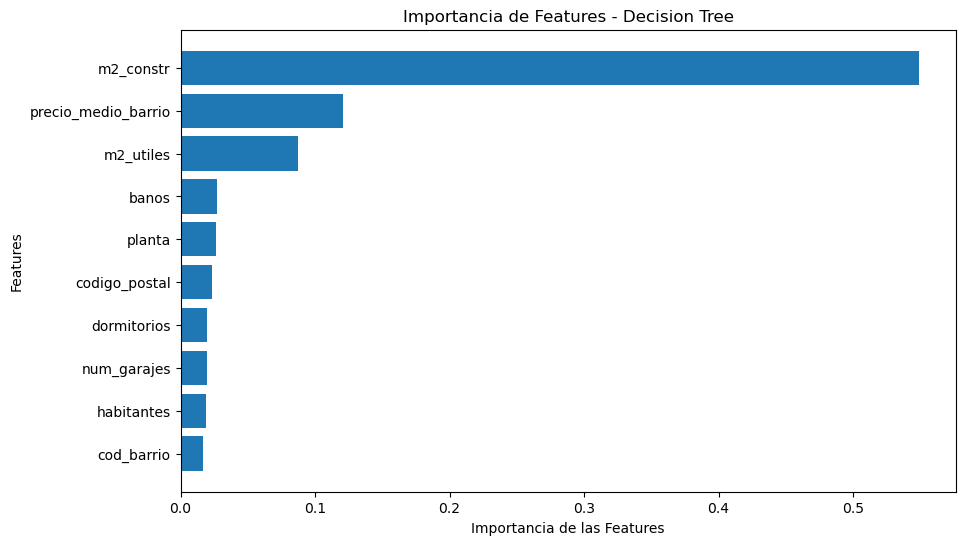

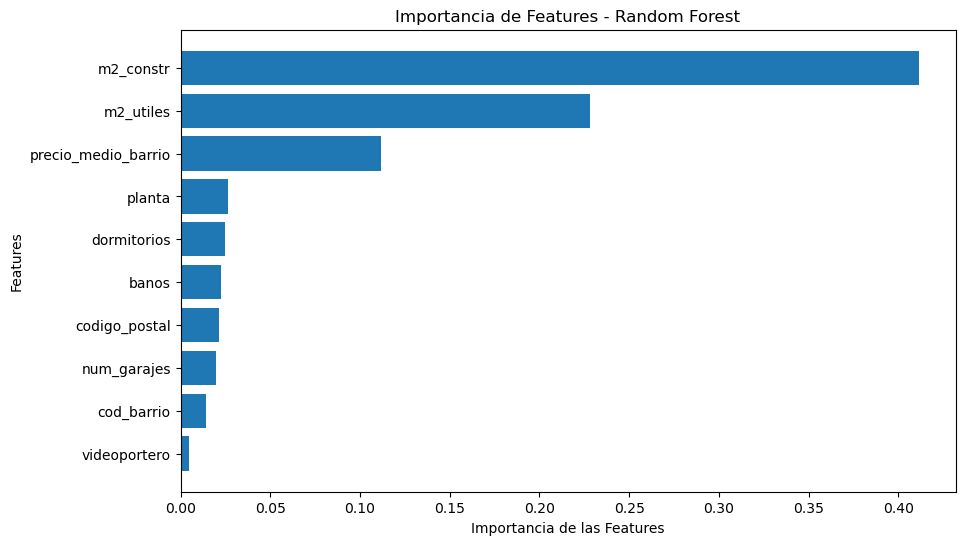

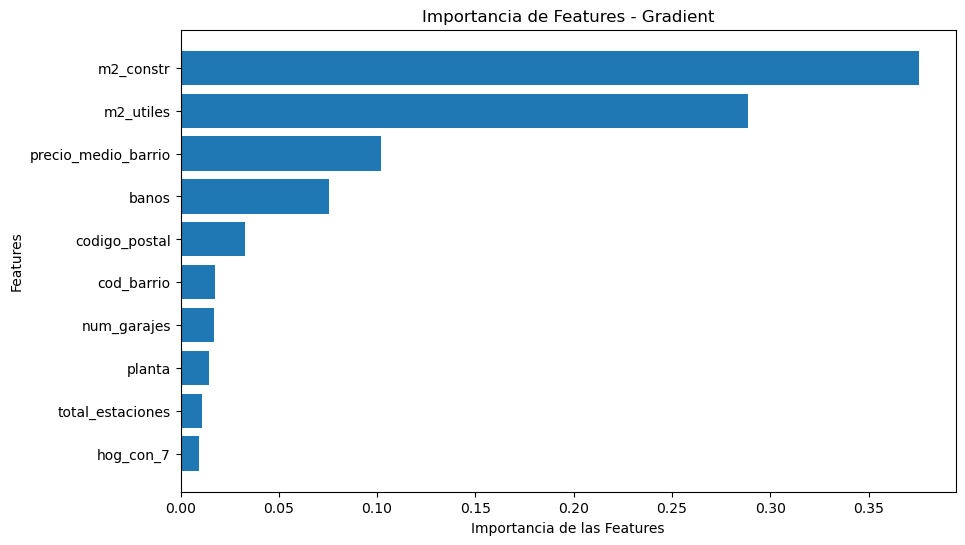

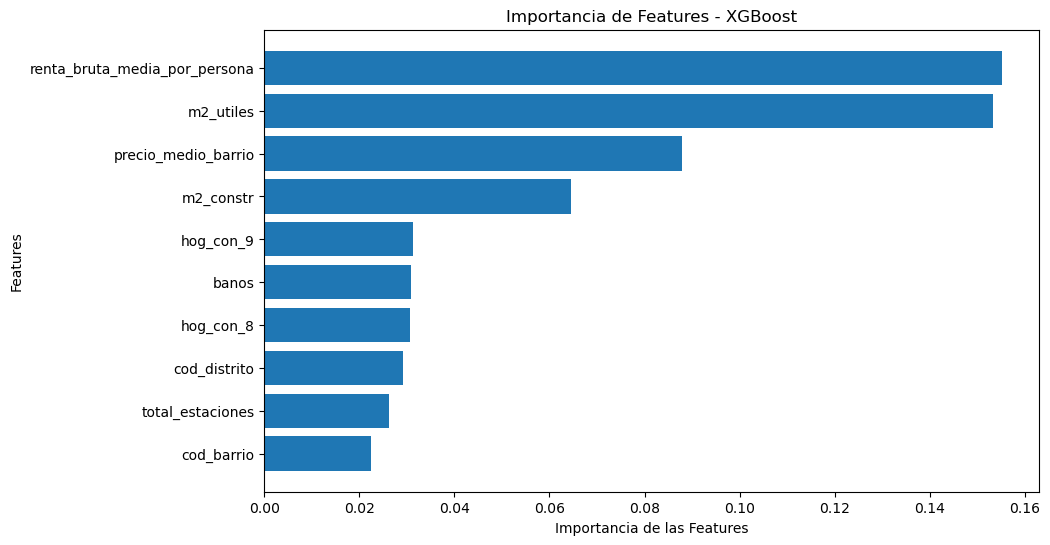

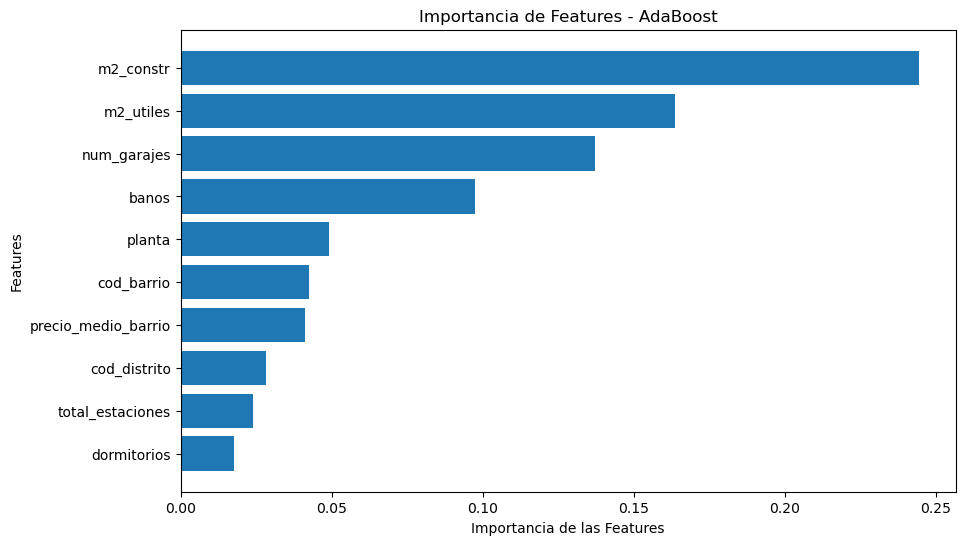

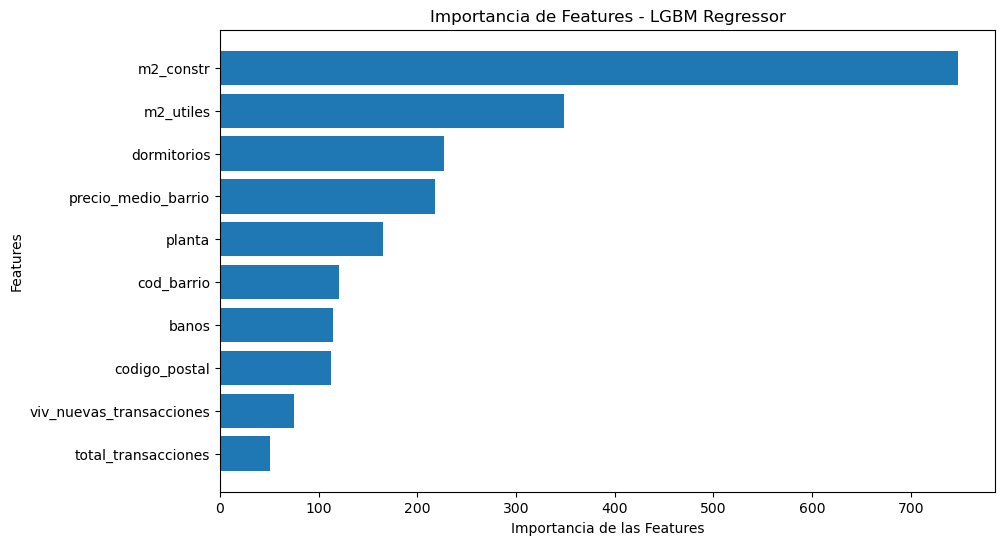

In [132]:
# Template list
models = {
 "Linear Regression": LinearRegression(),
 "Decision Tree": DecisionTreeRegressor(),
 "Random Forest": RandomForestRegressor(),
 "KNN Regressor": KNeighborsRegressor(),
 "Gradient": GradientBoostingRegressor(),
 "XGBoost": XGBRegressor(),
 "AdaBoost": AdaBoostRegressor(),
 "LGBM Regressor": lgb.LGBMRegressor()
}


# Loop para crear y entrenar modelos
for nome, modelo in models.items():
    
    # Entrenar el modelo
    modelo.fit(X_train_imputed, y_train)

    # Comprobar si el modelo tiene el atributo o método 'feature_importances_'
    if hasattr(modelo, 'feature_importances_'):
        
        # Obtener la importancia de las características
        importancias = modelo.feature_importances_

        # Obtener los nombres de las características
        nomes_features = X_train.columns  

        # Ordenar las características y sus importancias
        indices = np.argsort(importancias)
        importancias = importancias[indices]
        nomes_features = nomes_features[indices]

        # Seleccionar las 6 características más importantes
        importancias_top10 = importancias[-10:]
        nomes_features_top10 = nomes_features[-10:]

        # Graficar las 6 características más importantes
        plt.figure(figsize=(10, 6))
        plt.barh(range(len(nomes_features_top10)), importancias_top10, align='center')
        plt.yticks(range(len(nomes_features_top10)), nomes_features_top10)
        plt.xlabel('Importancia de las Features')
        plt.ylabel('Features')
        plt.title(f'Importancia de Features - {nome}')
        plt.grid(False)
        plt.show()
